In [81]:
import os
import numpy as np
import random
from skimage import io
import imgaug.augmenters as iaa
import imgaug.augmenters.flip as flip
import cv2 as cv2
import cv2
import Augmentor
import keras.utils as image
import matplotlib.pyplot as plt
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [82]:
root = r'C:\Users\harsh\Desktop\Gray_scale'
for i in range(0,16):
    directory_path = os.path.join(root,f'signature_{i+1}')
    if not os.path.exists(directory_path):
        os.mkdir(directory_path)
    else:
        print(f"Directory '{directory_path} already exists")

Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_1 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_2 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_3 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_4 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_5 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_6 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_7 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_8 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_9 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_10 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_11 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_12 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_13 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_14 al

In [83]:
data_dir = r'C:\Users\harsh\Desktop\Handwritten Signature Data\Data'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i , directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
rename_folders(data_dir)

In [84]:
def load_and_augment_data(folder_path, num_augmentations=20):
    augmenter = iaa.Sequential([
        iaa.Affine(rotate=(-25, 25), scale=(0.8, 1.2)),
        flip.Fliplr(p=0.5)
    ])

    X = []
    y = []

    classes = os.listdir(folder_path)
    for i, cls in enumerate(classes):
        cls_path = os.path.join(folder_path, cls)
        images = os.listdir(cls_path)
        for img in images:
            img_path = os.path.join(cls_path, img)
            #load the image
            image = io.imread(img_path)
            #apply the augmentation and save the new images
            for j in range(num_augmentations):
                aug_image = augmenter.augment_image(image)
                X.append(aug_image)
                y.append(i)

    X = np.array(X)
    y = np.array(y)

    #Shuffle the data
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    return X, y

In [85]:
load_and_augment_data(data_dir)

(array([], dtype=float64), array([], dtype=float64))

In [86]:
# code for grayscale images

directory = r'C:\Users\harsh\Desktop\Handwritten Signature Data\Data'

gray_path = r'C:\Users\Harsh\Desktop\Gray_scale'

def gray(directory):
    for root, dirs, files, in os.walk(directory):
        for i, directory in enumerate(dirs):
            print(i+1, directory)
            old_dir = os.path.join(root, directory)

            old_gray = os.path.join(gray_path, f'signature_{i+1}')
            for j, file_name in enumerate((os.listdir(old_dir))):
                filename = f'signature_{j+1}.jpg'
                #print(filename)
                img = cv2.imread((os.path.join(old_dir, filename)))# image read for grayscale

                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                cv2.imwrite((os.path.join(old_gray, f'signature_{j+1}.jpg')),gray)
                
            
gray(directory)

In [87]:
p = Augmentor.Pipeline(gray_path)

Initialised with 159 image(s) found.
Output directory set to C:\Users\Harsh\Desktop\Gray_scale\output.

In [88]:
p.rotate(probability = 0.7,max_left_rotation=10,max_right_rotation=10)

p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)

p.rotate270(probability=0.5)

p.flip_left_right(probability=0.5)

p.flip_top_bottom(probability=0.5)

p.zoom_random(probability=0.5, percentage_area=0.8)

# p.zoom(probability=0.3,min_factor=1.1,max_factor=1.6)

p.skew_left_right(0.5,0.3)

p.skew_top_bottom(0.5,0.5)
p.resize(1,519,276)
p.random_distortion(0.5,4,6,5) #probability, grid width, height,magnitude
p.shear(1,10,11) # prob, max_shear_left, max_shear_right


In [89]:
p.sample(1600)

Processing <PIL.Image.Image image mode=L size=519x276 at 0x2D0EAAB50D0>: 100%|██████████| 1600/1600 [00:05<00:00, 269.49 Samples/s]


In [90]:
# To rename Augmented Data

data_dir = r'C:\Users\harsh\Desktop\Gray_scale\output'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))

None


In [91]:
input_folder = r"C:\Users\harsh\Desktop\Gray_scale\output"
splitfolders.ratio (input_folder, output=r"C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_70_30",
                seed=42, ratio=(.70,.30),
                group_prefix=None)

Copying files: 1600 files [00:06, 252.38 files/s]


(519, 276)


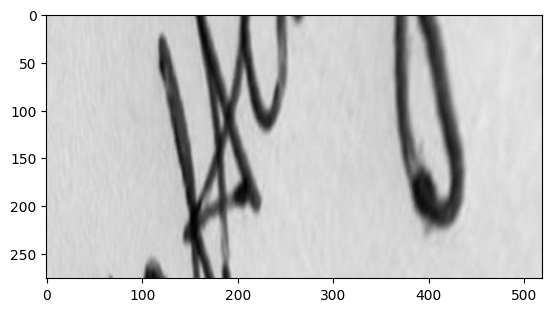

In [92]:
import keras.utils as image
import matplotlib.pyplot as plt
img = image.load_img(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_70_30\train\subject_1\signature_11.jpg')
plt.imshow(img)
print(img.size)

In [93]:
print(cv2.imread(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_70_30\train\subject_1\signature_11.jpg').shape)
cv2.imread(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_70_30\train\subject_1\signature_11.jpg')

(276, 519, 3)


array([[[207, 207, 207],
        [208, 208, 208],
        [211, 211, 211],
        ...,
        [222, 222, 222],
        [222, 222, 222],
        [223, 223, 223]],

       [[207, 207, 207],
        [209, 209, 209],
        [211, 211, 211],
        ...,
        [222, 222, 222],
        [222, 222, 222],
        [222, 222, 222]],

       [[208, 208, 208],
        [209, 209, 209],
        [211, 211, 211],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [222, 222, 222]],

       ...,

       [[212, 212, 212],
        [213, 213, 213],
        [215, 215, 215],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [221, 221, 221]],

       [[212, 212, 212],
        [213, 213, 213],
        [215, 215, 215],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [221, 221, 221]],

       [[212, 212, 212],
        [213, 213, 213],
        [215, 215, 215],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [221, 221, 221]]

In [94]:
#RUN FROM HERE

batch_size=50 #20  #15

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)


In [95]:
train_generator=train_datagen.flow_from_directory('C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_70_30//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

# same generator for validation data

validation_generator=test_datagen.flow_from_directory("C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_70_30//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

Found 1677 images belonging to 16 classes.
Found 1163 images belonging to 16 classes.


In [96]:
batch_size=50

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory('C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_70_30//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    class_mode='categorical'
)

# same generator for validation data
validation_generator=test_datagen.flow_from_directory("C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_70_30//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    class_mode='categorical'
)

num_samples = len(train_generator)
X_train = []
y_train = []
for i in range(num_samples):
    x_batch, y_batch = next(train_generator)
    X_train.append(x_batch)
    y_train.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

num_samples = len(validation_generator)
x_val = []
y_val = []
for i in range(num_samples):
    x_batch, y_batch = next(validation_generator)
    x_val.append(x_batch)
    y_val.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

Found 1677 images belonging to 16 classes.
Found 1163 images belonging to 16 classes.


# 25 EPOCH

In [97]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 25
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/25
40/40 [==============================] - 6s 125ms/step - loss: 2.8640 - accuracy: 0.0590 - val_loss: 2.7946 - val_accuracy: 0.0688
Epoch 2/25
40/40 [==============================] - 5s 126ms/step - loss: 2.7947 - accuracy: 0.0650 - val_loss: 2.7985 - val_accuracy: 0.0610
Epoch 3/25
40/40 [==============================] - 5s 131ms/step - loss: 2.7907 - accuracy: 0.0722 - val_loss: 2.7676 - val_accuracy: 0.0722
Epoch 4/25
40/40 [==============================] - 6s 141ms/step - loss: 2.7647 - accuracy: 0.0877 - val_loss: 2.7938 - val_accuracy: 0.0782
Epoch 5/25
40/40 [==============================] - 5s 134ms/step - loss: 2.7659 - accuracy: 0.0865 - val_loss: 2.7749 - val_accuracy: 0.0963
Epoch 6/25
40/40 [==============================] - 5s 132ms/step - loss: 2.7599 - accuracy: 0.0841 - val_loss: 2.7857 - val_accuracy: 0.0679
Epoch 7/25
40/40 [==============================] - 6s 139ms/step - loss: 2.7465 - accuracy: 0.1044 - val_loss: 2.7572 - val_accuracy: 0.0937
Epoch 

In [98]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

37/37 [==============================] - 2s 41ms/step - loss: 2.7498 - accuracy: 0.1015
Test Loss: 2.7497966289520264
Test Accuracy: 0.1014617383480072
37/37 [==============================] - 2s 40ms/step


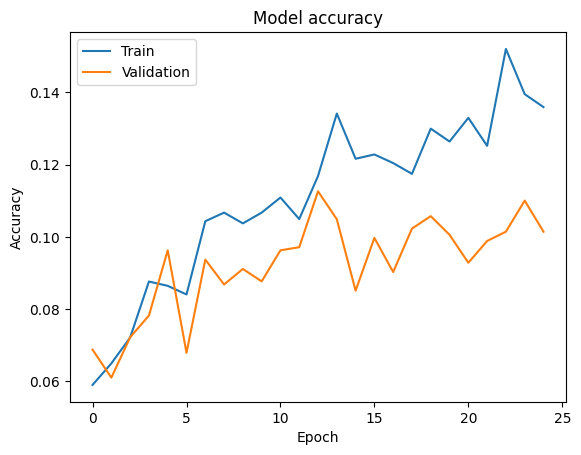

In [99]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


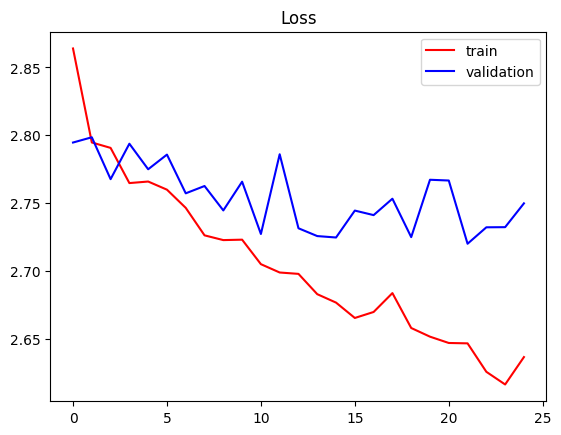

In [100]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

37/37 [==============================] - 2s 41ms/step


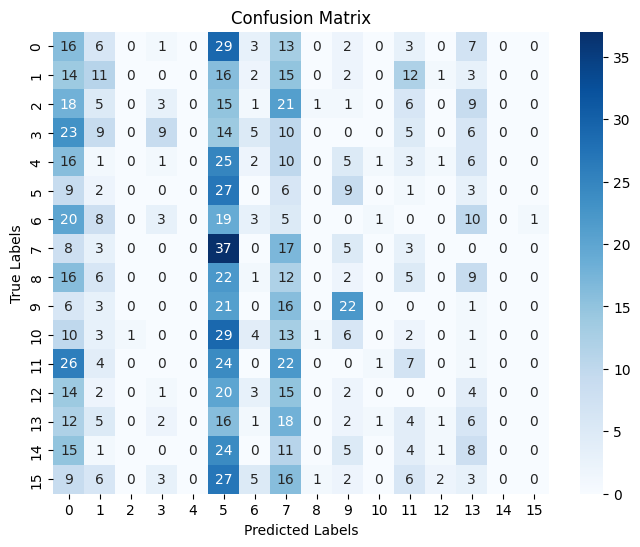

In [101]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [102]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.1059184271208039
Average False Positive Rate (FPR): 0.05973444780301084
Average True Negative Rate (TNR): 0.9402655521969892
Average False Negative Rate (FNR): 0.8940815728791961
Average Precision: 0.08683247353067865
Average Recall: 0.1059184271208039
Average F1-Score: 0.07702166696391721


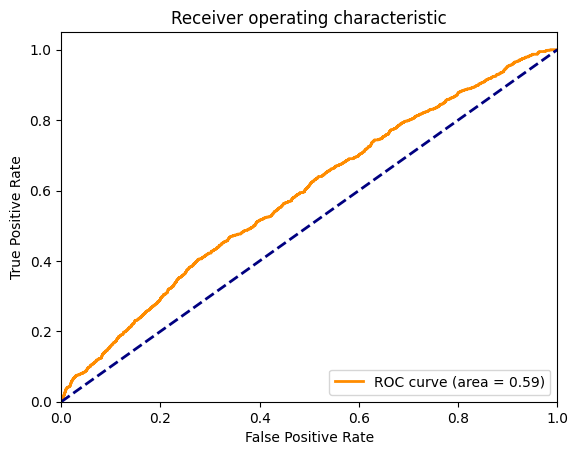

In [103]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 30 EPOCH

In [104]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 30
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/30
40/40 [==============================] - 6s 137ms/step - loss: 2.8843 - accuracy: 0.0632 - val_loss: 2.8218 - val_accuracy: 0.0808
Epoch 2/30
40/40 [==============================] - 5s 138ms/step - loss: 2.7912 - accuracy: 0.0680 - val_loss: 2.7866 - val_accuracy: 0.0722
Epoch 3/30
40/40 [==============================] - 6s 139ms/step - loss: 2.7759 - accuracy: 0.0775 - val_loss: 2.7653 - val_accuracy: 0.0903
Epoch 4/30
40/40 [==============================] - 5s 130ms/step - loss: 2.7741 - accuracy: 0.0847 - val_loss: 2.7768 - val_accuracy: 0.0825
Epoch 5/30
40/40 [==============================] - 5s 130ms/step - loss: 2.7610 - accuracy: 0.0722 - val_loss: 2.7784 - val_accuracy: 0.0722
Epoch 6/30
40/40 [==============================] - 5s 131ms/step - loss: 2.7610 - accuracy: 0.0799 - val_loss: 2.7523 - val_accuracy: 0.0817
Epoch 7/30
40/40 [==============================] - 5s 130ms/step - loss: 2.7335 - accuracy: 0.0990 - val_loss: 2.7734 - val_accuracy: 0.0731
Epoch 

In [105]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

37/37 [==============================] - 2s 41ms/step - loss: 2.7274 - accuracy: 0.1083
Test Loss: 2.7274179458618164
Test Accuracy: 0.10834050178527832
37/37 [==============================] - 2s 40ms/step


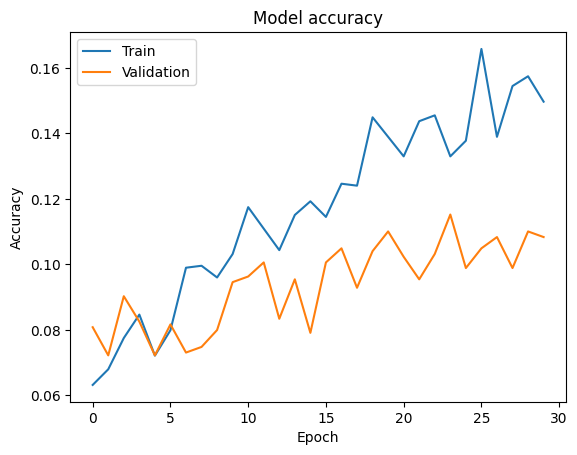

In [106]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


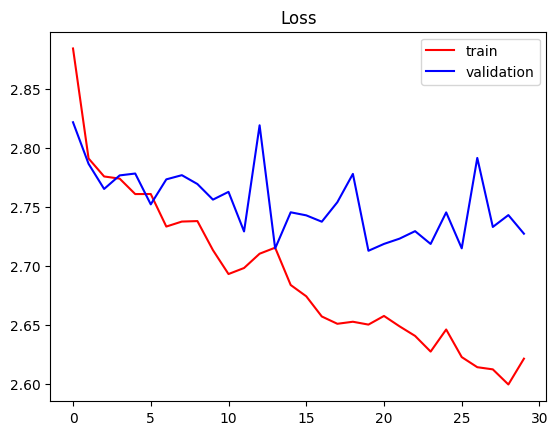

In [107]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

37/37 [==============================] - 2s 41ms/step


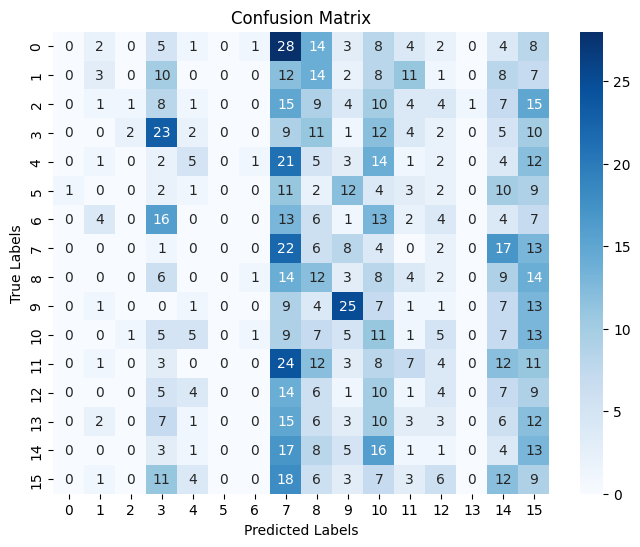

In [108]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [109]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.10687248032792959
Average False Positive Rate (FPR): 0.05950165814111709
Average True Negative Rate (TNR): 0.9404983418588829
Average False Negative Rate (FNR): 0.8931275196720704
Average Precision: 0.10732559583504386
Average Recall: 0.10687248032792959
Average F1-Score: 0.0884101334678469


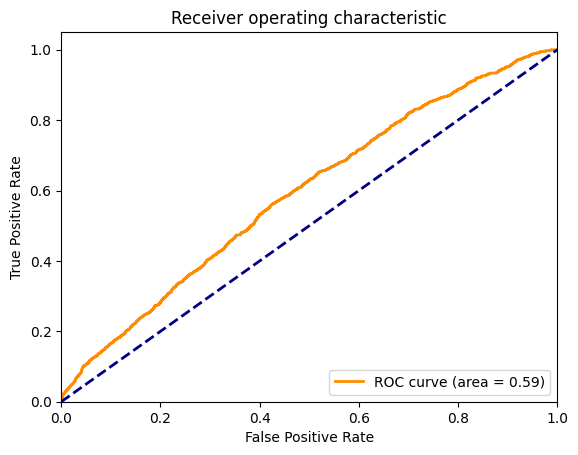

In [110]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 35 EPOCH

In [111]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 35
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/35
40/40 [==============================] - 9s 198ms/step - loss: 2.8395 - accuracy: 0.0638 - val_loss: 2.7926 - val_accuracy: 0.0731
Epoch 2/35
40/40 [==============================] - 8s 192ms/step - loss: 2.7826 - accuracy: 0.0757 - val_loss: 2.7772 - val_accuracy: 0.0800
Epoch 3/35
40/40 [==============================] - 8s 191ms/step - loss: 2.7660 - accuracy: 0.0739 - val_loss: 2.7782 - val_accuracy: 0.0877
Epoch 4/35
40/40 [==============================] - 8s 192ms/step - loss: 2.7522 - accuracy: 0.0871 - val_loss: 2.8047 - val_accuracy: 0.0791
Epoch 5/35
40/40 [==============================] - 8s 190ms/step - loss: 2.7639 - accuracy: 0.0918 - val_loss: 2.7548 - val_accuracy: 0.0894
Epoch 6/35
40/40 [==============================] - 7s 189ms/step - loss: 2.7421 - accuracy: 0.0936 - val_loss: 2.7455 - val_accuracy: 0.0825
Epoch 7/35
40/40 [==============================] - 8s 189ms/step - loss: 2.7439 - accuracy: 0.0966 - val_loss: 2.7458 - val_accuracy: 0.0800
Epoch 

In [112]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

37/37 [==============================] - 2s 46ms/step - loss: 2.8374 - accuracy: 0.0877
Test Loss: 2.8373868465423584
Test Accuracy: 0.08770421147346497
37/37 [==============================] - 2s 46ms/step


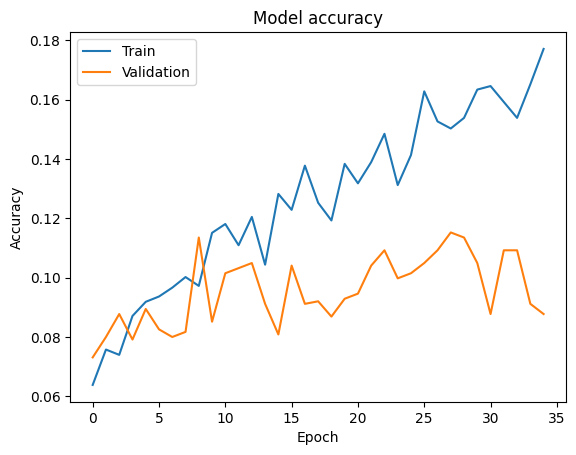

In [113]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


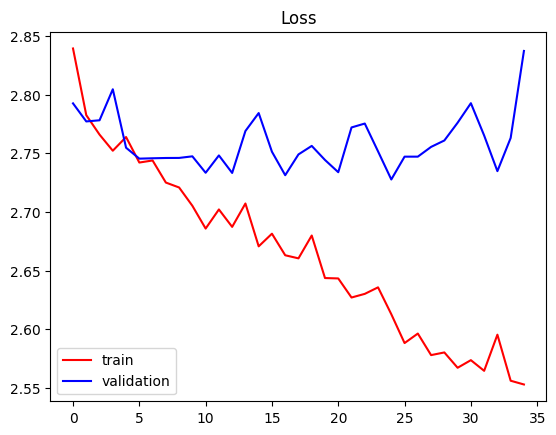

In [114]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

37/37 [==============================] - 2s 47ms/step


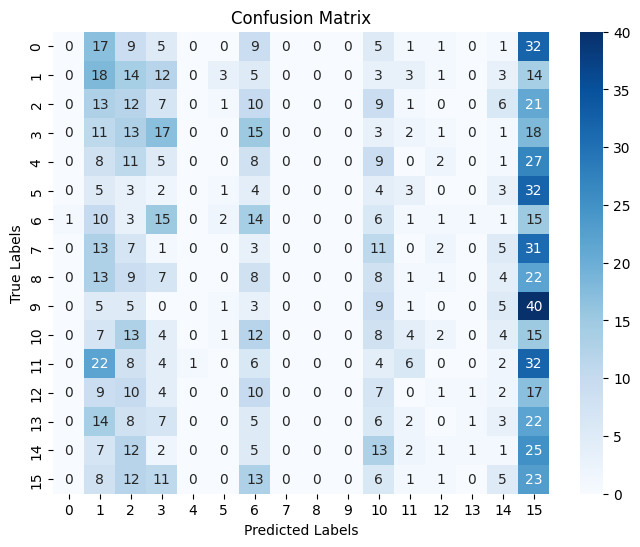

In [115]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [116]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.08326428351881685
Average False Positive Rate (FPR): 0.061039218773981524
Average True Negative Rate (TNR): 0.9389607812260183
Average False Negative Rate (FNR): 0.9167357164811831
Average Precision: 0.07831483256271468
Average Recall: 0.08326428351881685
Average F1-Score: 0.060344055179745004


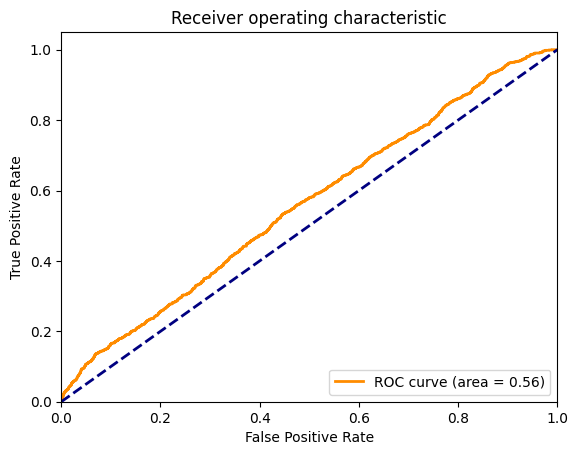

In [117]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 40 EPOCH

In [118]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 40
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/40
40/40 [==============================] - 7s 157ms/step - loss: 2.8707 - accuracy: 0.0572 - val_loss: 2.8117 - val_accuracy: 0.0851
Epoch 2/40
40/40 [==============================] - 6s 146ms/step - loss: 2.7963 - accuracy: 0.0626 - val_loss: 2.7703 - val_accuracy: 0.0765
Epoch 3/40
40/40 [==============================] - 6s 144ms/step - loss: 2.7792 - accuracy: 0.0781 - val_loss: 2.7781 - val_accuracy: 0.0748
Epoch 4/40
40/40 [==============================] - 6s 146ms/step - loss: 2.7801 - accuracy: 0.0680 - val_loss: 2.7762 - val_accuracy: 0.0714
Epoch 5/40
40/40 [==============================] - 6s 146ms/step - loss: 2.7699 - accuracy: 0.0799 - val_loss: 2.7553 - val_accuracy: 0.0800
Epoch 6/40
40/40 [==============================] - 6s 155ms/step - loss: 2.7508 - accuracy: 0.0936 - val_loss: 2.7587 - val_accuracy: 0.0920
Epoch 7/40
40/40 [==============================] - 6s 151ms/step - loss: 2.7407 - accuracy: 0.1026 - val_loss: 2.7572 - val_accuracy: 0.0860
Epoch 

In [119]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

37/37 [==============================] - 2s 46ms/step - loss: 2.7523 - accuracy: 0.1058
Test Loss: 2.752297878265381
Test Accuracy: 0.10576096177101135
37/37 [==============================] - 2s 45ms/step


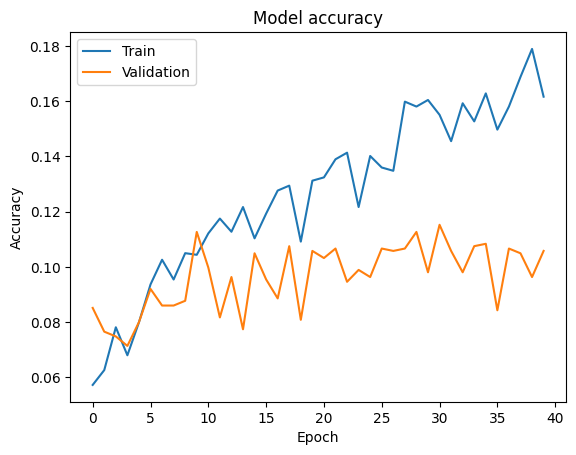

In [120]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


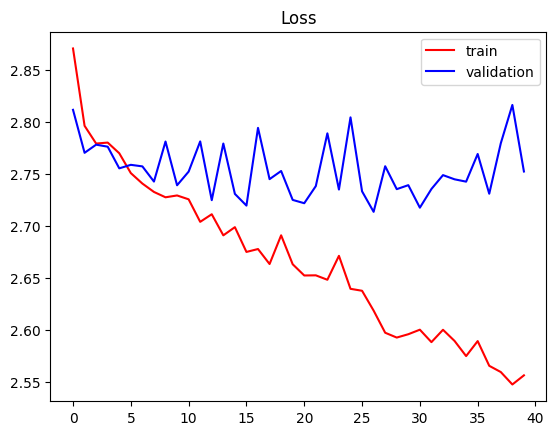

In [121]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

37/37 [==============================] - 2s 46ms/step


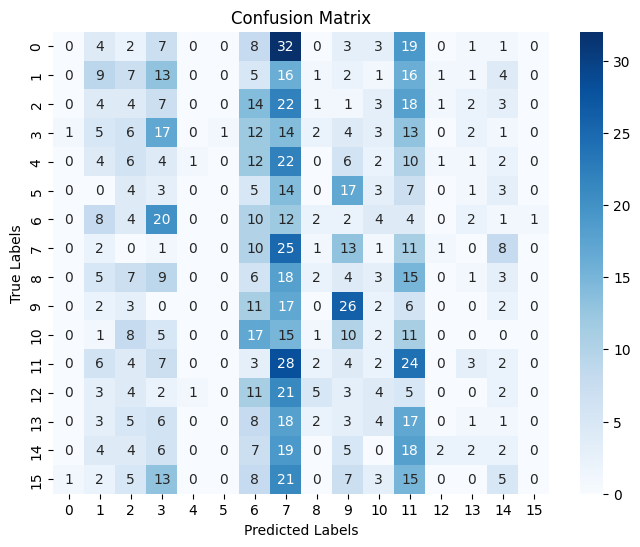

In [122]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [123]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.10228310081184985
Average False Positive Rate (FPR): 0.05976785997662301
Average True Negative Rate (TNR): 0.940232140023377
Average False Negative Rate (FNR): 0.8977168991881501
Average Precision: 0.10028439889823476
Average Recall: 0.10228310081184985
Average F1-Score: 0.07465471091164902


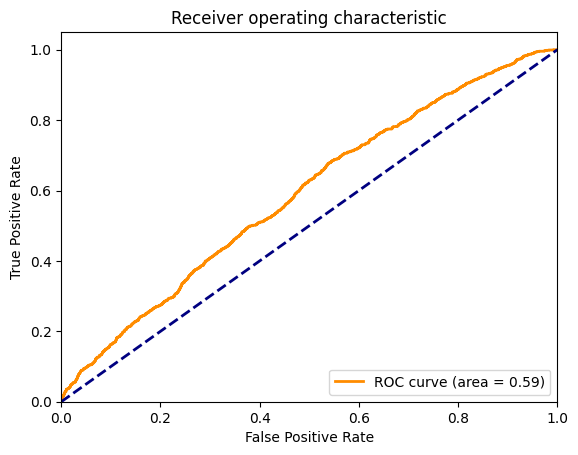

In [124]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 45 EPOCH

In [125]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 45
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/45
40/40 [==============================] - 6s 141ms/step - loss: 2.8610 - accuracy: 0.0566 - val_loss: 2.8311 - val_accuracy: 0.0567
Epoch 2/45
40/40 [==============================] - 5s 138ms/step - loss: 2.7942 - accuracy: 0.0710 - val_loss: 2.7806 - val_accuracy: 0.0791
Epoch 3/45
40/40 [==============================] - 5s 136ms/step - loss: 2.7760 - accuracy: 0.0847 - val_loss: 2.7860 - val_accuracy: 0.0782
Epoch 4/45
40/40 [==============================] - 5s 138ms/step - loss: 2.7678 - accuracy: 0.0769 - val_loss: 2.7488 - val_accuracy: 0.0808
Epoch 5/45
40/40 [==============================] - 5s 138ms/step - loss: 2.7438 - accuracy: 0.0877 - val_loss: 2.7715 - val_accuracy: 0.0817
Epoch 6/45
40/40 [==============================] - 5s 136ms/step - loss: 2.7388 - accuracy: 0.1061 - val_loss: 2.7717 - val_accuracy: 0.0980
Epoch 7/45
40/40 [==============================] - 5s 136ms/step - loss: 2.7392 - accuracy: 0.1133 - val_loss: 2.7320 - val_accuracy: 0.0851
Epoch 

In [126]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

37/37 [==============================] - 2s 44ms/step - loss: 2.7756 - accuracy: 0.1049
Test Loss: 2.7756102085113525
Test Accuracy: 0.10490112006664276
37/37 [==============================] - 2s 38ms/step


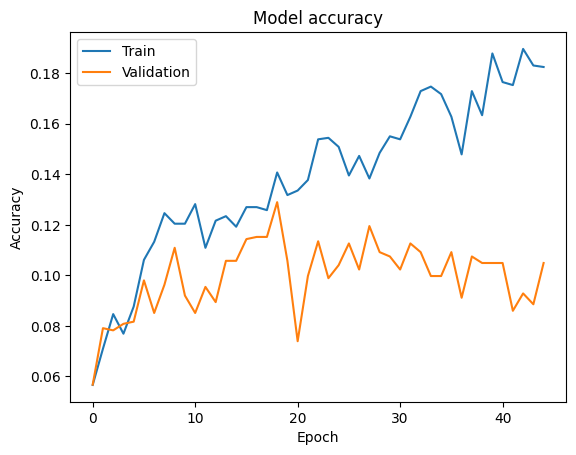

In [127]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


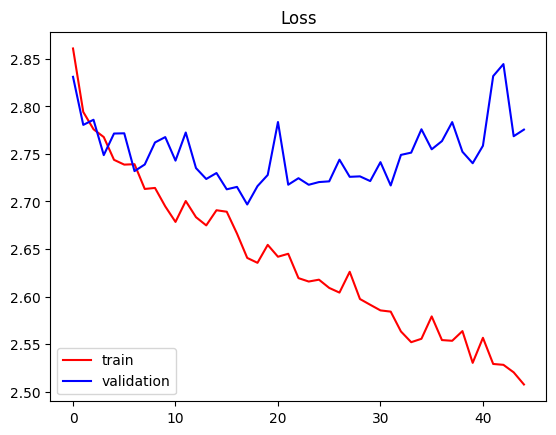

In [128]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

37/37 [==============================] - 1s 36ms/step


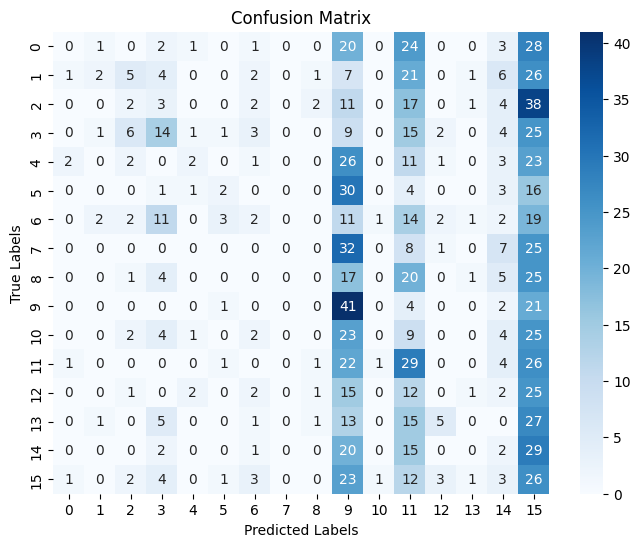

In [129]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [130]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.1003342708741276
Average False Positive Rate (FPR): 0.059896692116182454
Average True Negative Rate (TNR): 0.9401033078838176
Average False Negative Rate (FNR): 0.8996657291258724
Average Precision: 0.09748485738357737
Average Recall: 0.1003342708741276
Average F1-Score: 0.061562549213576394


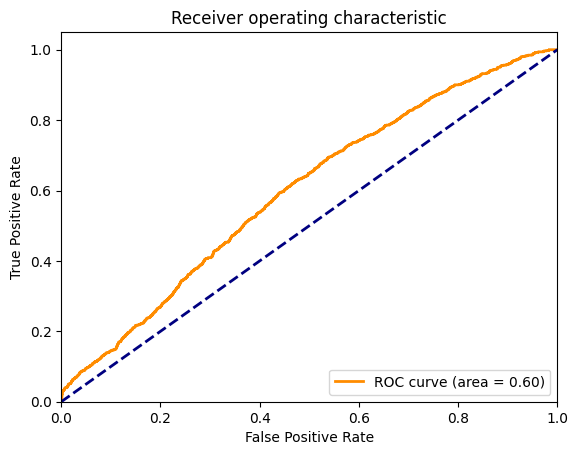

In [131]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 80 EPOCH

In [132]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 80
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/80
40/40 [==============================] - 6s 136ms/step - loss: 2.8728 - accuracy: 0.0638 - val_loss: 2.7973 - val_accuracy: 0.0817
Epoch 2/80
40/40 [==============================] - 5s 133ms/step - loss: 2.7831 - accuracy: 0.0733 - val_loss: 2.7805 - val_accuracy: 0.0782
Epoch 3/80
40/40 [==============================] - 5s 132ms/step - loss: 2.7802 - accuracy: 0.0835 - val_loss: 2.7583 - val_accuracy: 0.0800
Epoch 4/80
40/40 [==============================] - 5s 131ms/step - loss: 2.7631 - accuracy: 0.0847 - val_loss: 2.7639 - val_accuracy: 0.0739
Epoch 5/80
40/40 [==============================] - 5s 131ms/step - loss: 2.7515 - accuracy: 0.0865 - val_loss: 2.7843 - val_accuracy: 0.0868
Epoch 6/80
40/40 [==============================] - 5s 131ms/step - loss: 2.7594 - accuracy: 0.0781 - val_loss: 2.7555 - val_accuracy: 0.0937
Epoch 7/80
40/40 [==============================] - 5s 132ms/step - loss: 2.7518 - accuracy: 0.0954 - val_loss: 2.7495 - val_accuracy: 0.0808
Epoch 

In [133]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

37/37 [==============================] - 1s 37ms/step - loss: 2.8839 - accuracy: 0.1101
Test Loss: 2.8839211463928223
Test Accuracy: 0.1100601926445961
37/37 [==============================] - 1s 37ms/step


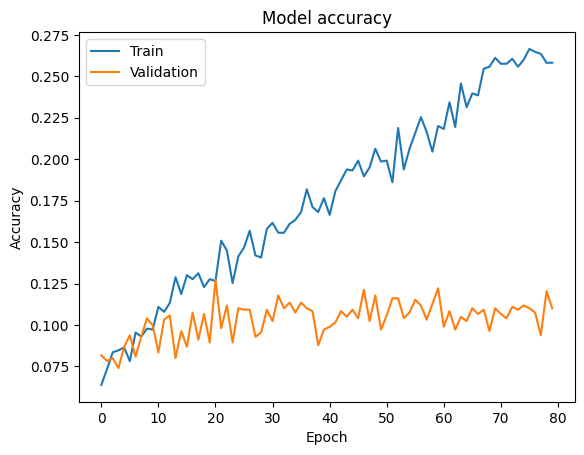

In [134]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


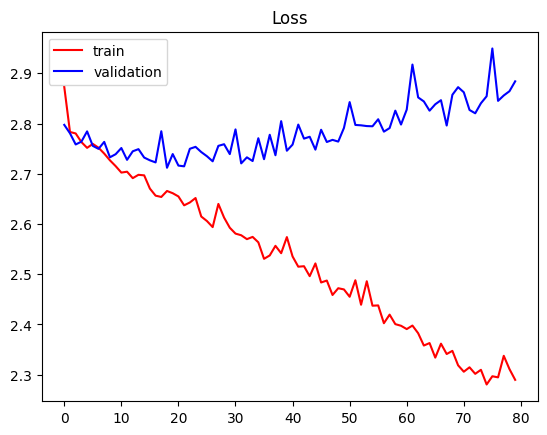

In [135]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

37/37 [==============================] - 2s 55ms/step


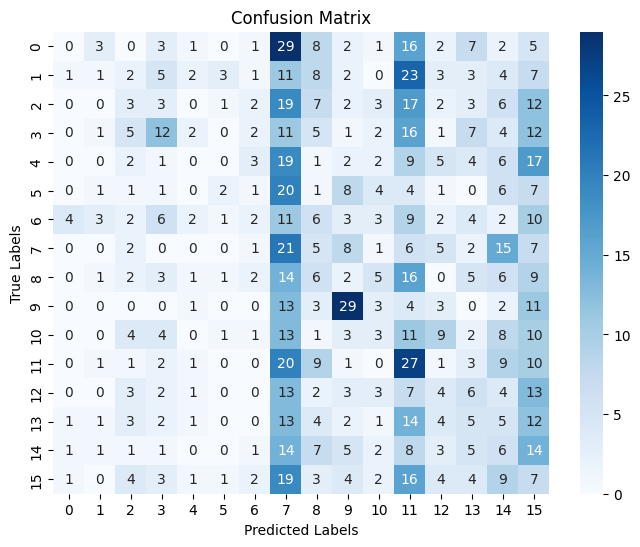

In [136]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [137]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.10791762282512937
Average False Positive Rate (FPR): 0.05946174746863399
Average True Negative Rate (TNR): 0.940538252531366
Average False Negative Rate (FNR): 0.8920823771748706
Average Precision: 0.10904376669206835
Average Recall: 0.10791762282512937
Average F1-Score: 0.09349930568077713


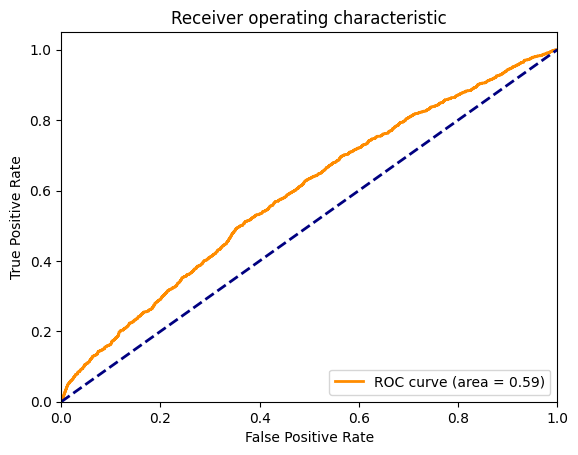

In [138]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 200 EPOCH

In [139]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 200
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/200
40/40 [==============================] - 10s 236ms/step - loss: 2.8500 - accuracy: 0.0638 - val_loss: 2.8187 - val_accuracy: 0.0636
Epoch 2/200
40/40 [==============================] - 11s 266ms/step - loss: 2.7942 - accuracy: 0.0668 - val_loss: 2.7958 - val_accuracy: 0.0671
Epoch 3/200
40/40 [==============================] - 16s 397ms/step - loss: 2.7805 - accuracy: 0.0727 - val_loss: 2.7618 - val_accuracy: 0.0834
Epoch 4/200
40/40 [==============================] - 15s 382ms/step - loss: 2.7743 - accuracy: 0.0686 - val_loss: 2.7683 - val_accuracy: 0.0903
Epoch 5/200
40/40 [==============================] - 15s 381ms/step - loss: 2.7661 - accuracy: 0.0877 - val_loss: 2.7712 - val_accuracy: 0.0739
Epoch 6/200
40/40 [==============================] - 15s 384ms/step - loss: 2.7621 - accuracy: 0.0877 - val_loss: 2.7573 - val_accuracy: 0.0843
Epoch 7/200
40/40 [==============================] - 15s 383ms/step - loss: 2.7563 - accuracy: 0.0888 - val_loss: 2.7589 - val_accuracy:

In [140]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

37/37 [==============================] - 2s 63ms/step - loss: 3.0658 - accuracy: 0.1350
Test Loss: 3.0657570362091064
Test Accuracy: 0.134995698928833
37/37 [==============================] - 2s 63ms/step


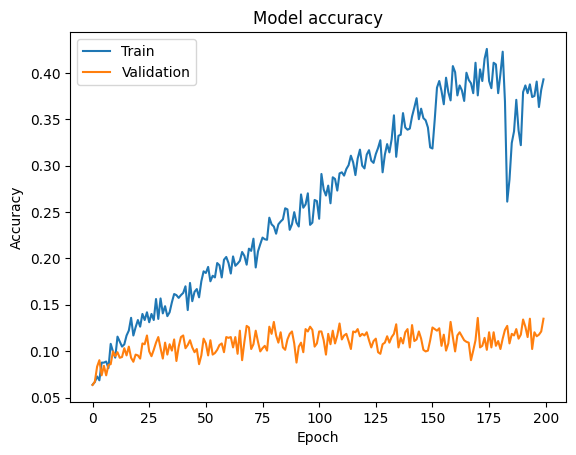

In [141]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


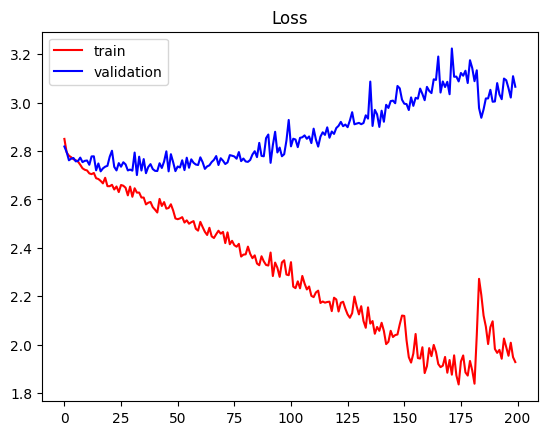

In [142]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

37/37 [==============================] - 2s 63ms/step


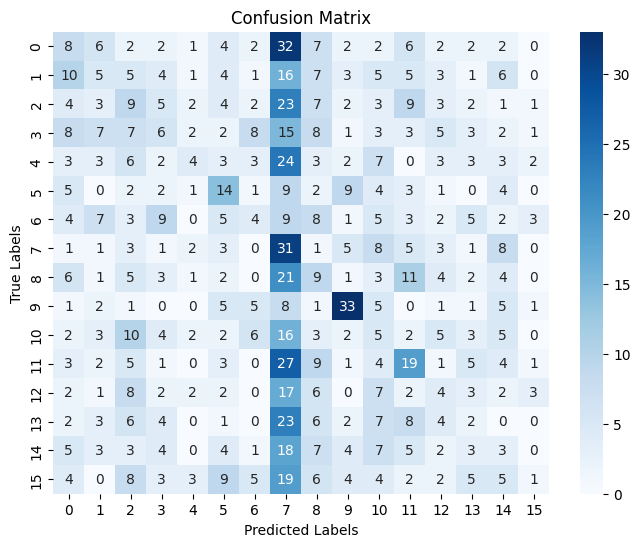

In [143]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [144]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.13647414515394204
Average False Positive Rate (FPR): 0.05768674965200322
Average True Negative Rate (TNR): 0.9423132503479967
Average False Negative Rate (FNR): 0.863525854846058
Average Precision: 0.13574352051155608
Average Recall: 0.13647414515394204
Average F1-Score: 0.12457025535294969


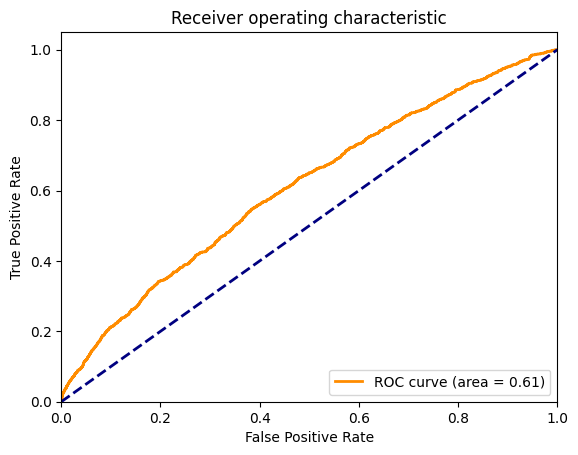

In [145]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()